<a href="https://colab.research.google.com/github/vanquoc26/Du-An_Shopee-spam-non-spam-comment/blob/main/DOAN_KTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
 !pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-w9i_dtnj
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-w9i_dtnj
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit 326b0a57a80c6d0b4bad25ca7adf8138419ef1cb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nvcc4jupyter: filename=nvcc4jupyter-1.2.1-py3-none-any.whl size=10741 sha256=1c43b610d84440f376c57bb0b3d20f87e2433fdb6f06eb98d5fd7c81c461a971
  Stored in directory: /tmp/pip-ephem-wheel-cache-vblrqb7_/wheels/a8/b9/18/23f8ef71ceb0f63297dd1903aedd067e6243a68ea756d6feea
Successfully built nvcc4jupyter


In [ ]:
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download VnCoreNLP pre-trained model
!wget -O VnCoreNLP-1.1.1.jar https://github.com/vncorenlp/VnCoreNLP/blob/master/VnCoreNLP-1.1.1.jar

--2024-06-01 07:13:00--  https://github.com/vncorenlp/VnCoreNLP/blob/master/VnCoreNLP-1.1.1.jar
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar     [ <=>                ] 152.11K  --.-KB/s    in 0.1s    

2024-06-01 07:13:01 (1.49 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [155759]



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Install and Import Libraries**

In [ ]:
!pip install torch transformers
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install py_vncorenlp
!pip install underthesea
!pip install transformers
!pip install pyvi
!pip install nltk
!pip install torch
!pip install scikit-learn
!pip install xgboost


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from transformers import get_linear_schedule_with_warmup
import numpy as np
import py_vncorenlp
from py_vncorenlp import VnCoreNLP
import underthesea
import transformers
from transformers import AutoModel, PhobertTokenizer
from sklearn.metrics import precision_score, recall_score, f1_score
import re
import pyvi
from pyvi import ViUtils
from nltk import word_tokenize
import torch
import sklearn
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import xgboost as xgb

In [ ]:
# Import EDA Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Import Data**

In [ ]:
df = pd.read_json("/content/gdrive/MyDrive/KTDL & TTXH/Data/labeled_data.json")

## Check for missing values

In [ ]:
print(df.isnull().sum())

username          0
rating            0
comment           0
product_name      0
id                0
sentiment        43
annotator         0
annotation_id     0
created_at        0
updated_at        0
lead_time         0
dtype: int64


## Statistics for categorical columns

In [ ]:
print(df['rating'].value_counts())

rating
5    5432
4     202
1     130
3     112
2      56
Name: count, dtype: int64


## Sentiment distribution chart

In [ ]:
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

<ipython-input-11-15346cca3ca7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette=color_palette)


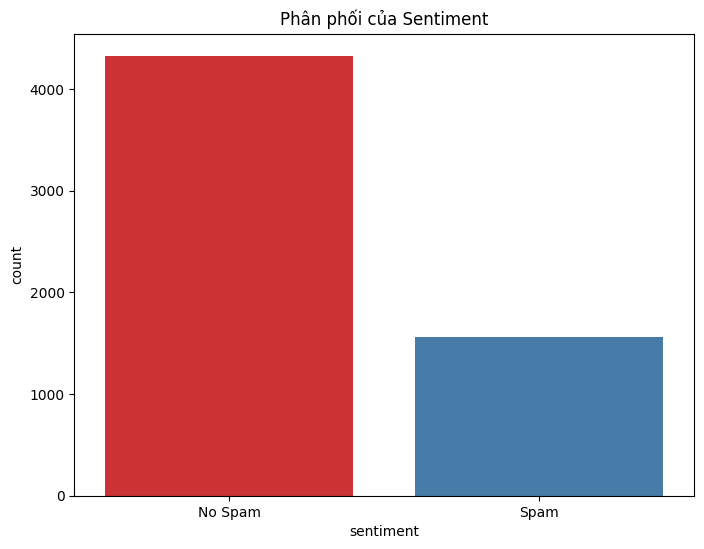

In [ ]:

color_palette = "Set1"
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette=color_palette)
plt.title('Distribution of Sentiment')
plt.show()

## Ratings By Sentiments

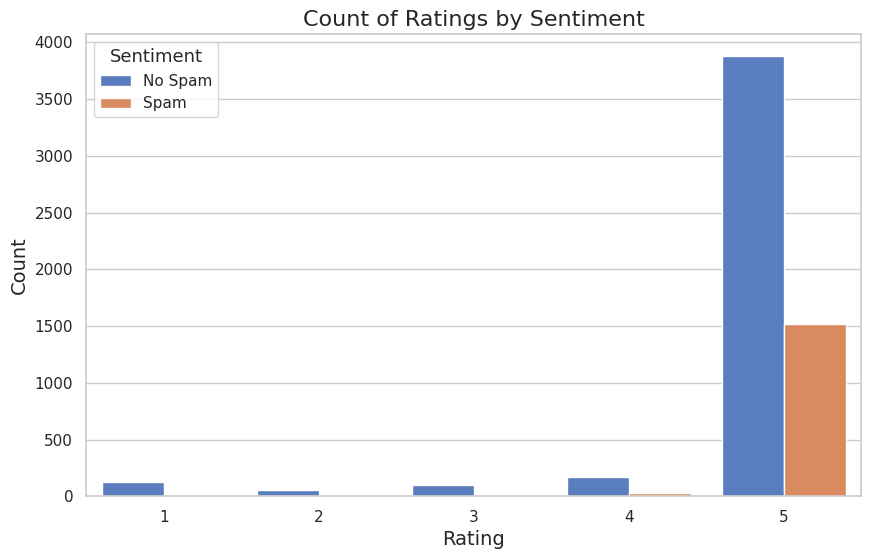

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the chart
sns.set(style="whitegrid")

# Draw a frequency chart for each rating and sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='sentiment', data=df, palette='muted')

# Set a title and label for the chart
plt.title('Count of Ratings by Sentiment', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sentiment', title_fontsize='13', fontsize='11')
plt.show()


## WordCloud

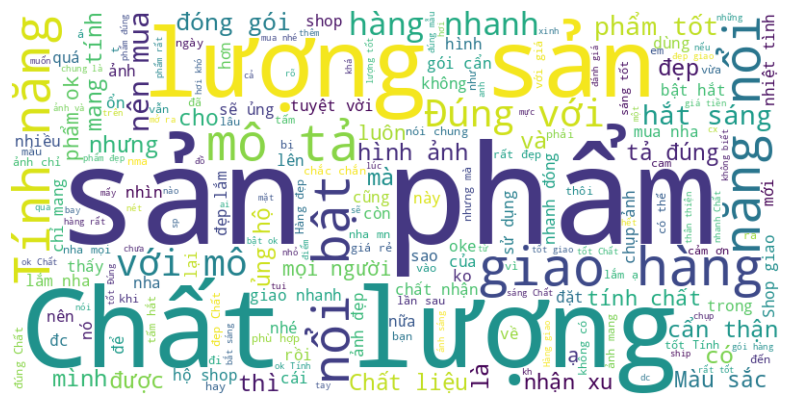

In [ ]:
from wordcloud import WordCloud

# Combine all comments into one thread
all_comments = ' '.join(df['comment'].astype(str))

# Ceate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Show WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Comment Lengths

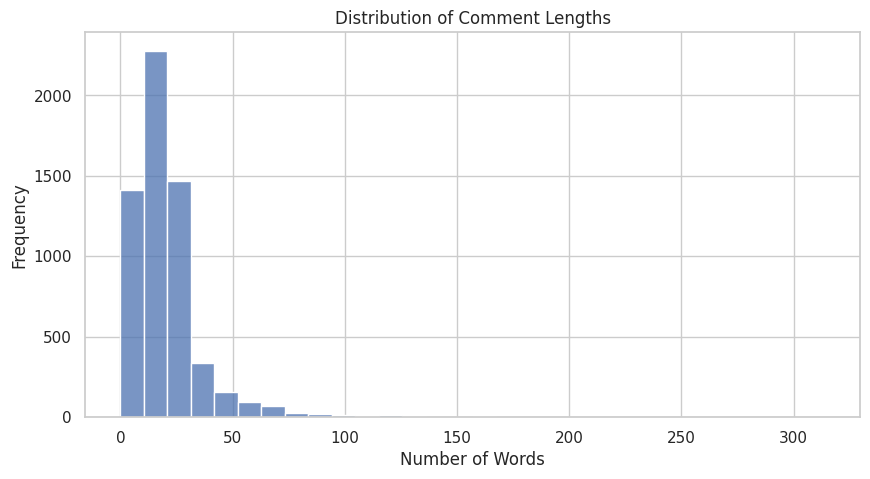

In [ ]:
# Calculate the length of each comment
df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))

# Plot the distribution of comment lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['comment_length'], bins=30)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

## Most Common Words

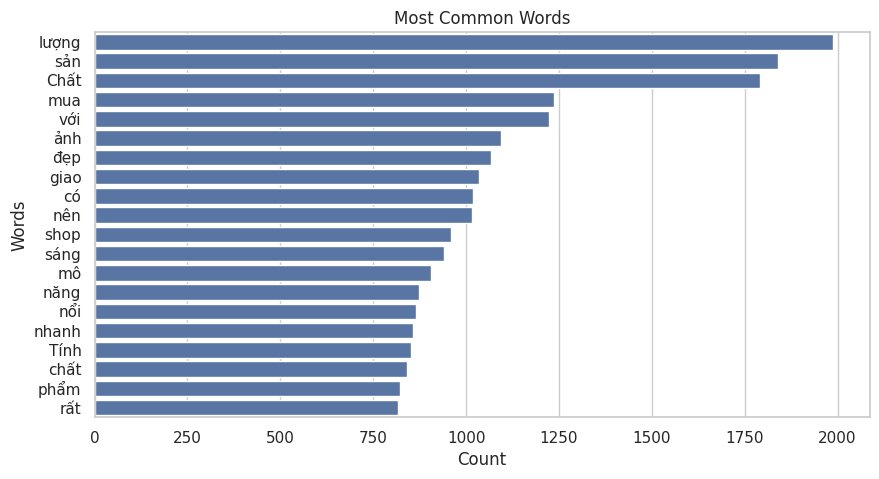

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read stopwords from file
with open("/content/gdrive/MyDrive/KTDL & TTXH/vietnamese-stopwords.txt", 'r', encoding='utf-8') as file:
    vietnamese_stopwords = file.readlines()
vietnamese_stopwords = [word.strip() for word in vietnamese_stopwords]

# Combine all comments into one thread
all_comments = ' '.join(df['comment'].astype(str))

# Split words and remove stopwords
words = all_comments.split()
filtered_words = [word for word in words if word.lower() not in vietnamese_stopwords]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the 20 most common words
common_words = word_counts.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Draw a chart
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Most Common Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


## Distribution of word counts for Spam/Non-spam comments

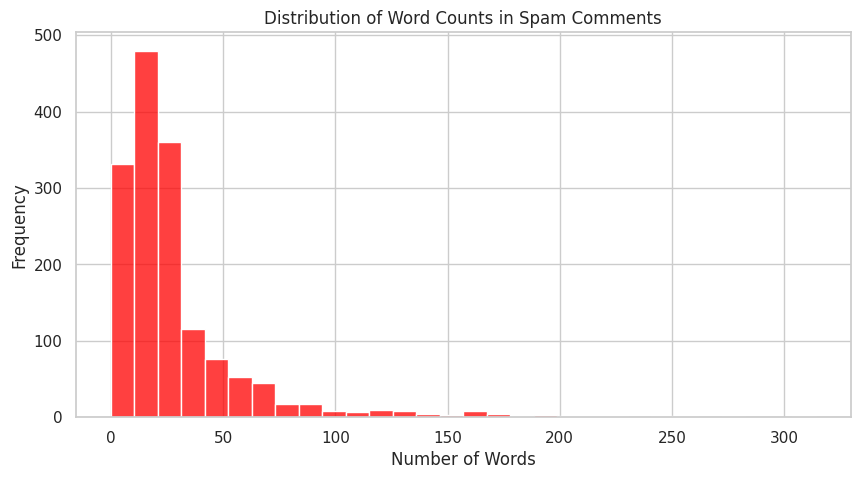

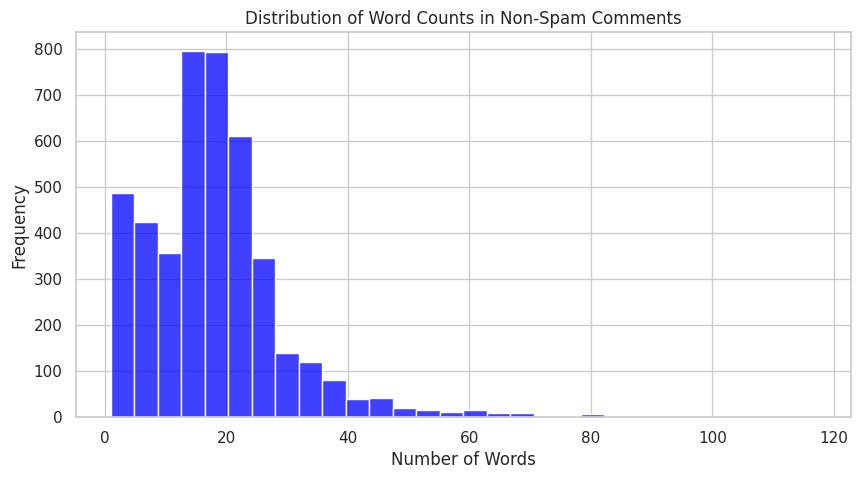

In [ ]:
# Compute the number of words in each comment
df['word_count'] = df['comment'].apply(lambda x: len(x.split()))

# Split the dataframe into spam and non-spam
df_spam = df[df['sentiment'] == 'Spam']
df_non_spam = df[df['sentiment'] == 'No Spam']

# Plot distribution of word counts for spam comments
plt.figure(figsize=(10, 5))
sns.histplot(df_spam['word_count'], bins=30, color='red')
plt.title('Distribution of Word Counts in Spam Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of word counts for non-spam comments
plt.figure(figsize=(10, 5))
sns.histplot(df_non_spam['word_count'], bins=30, color='blue')
plt.title('Distribution of Word Counts in Non-Spam Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


## Most Common Words in Spam / Non-Spam Comments

<ipython-input-17-841d09f65c3e>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_spam_df, palette='Reds_d')


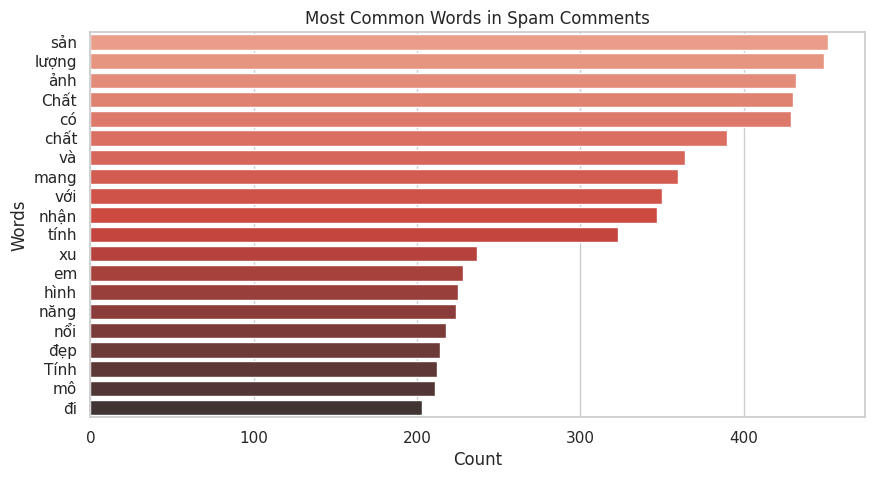

<ipython-input-17-841d09f65c3e>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_non_spam_df, palette='Blues_d')


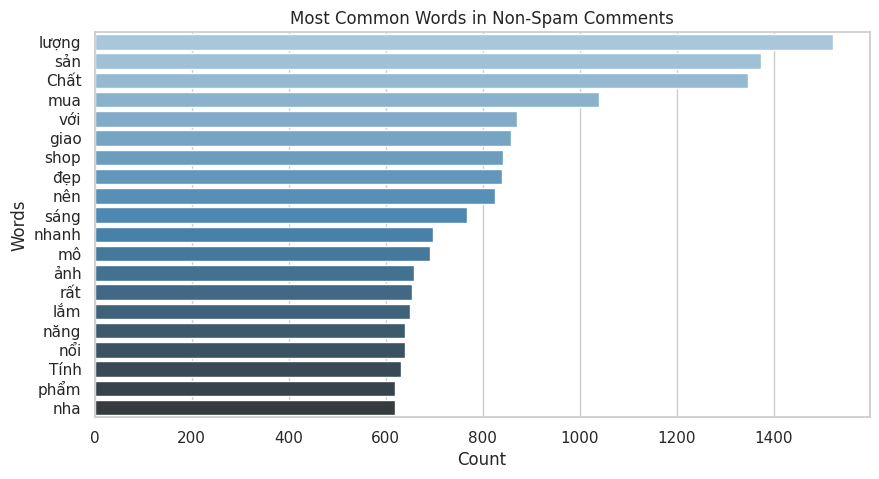

In [ ]:
from collections import Counter

# Function to get common words excluding stopwords
def get_common_words(comments, stopwords, top_n=20):
    words = ' '.join(comments).split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(top_n)

# Get stopwords
with open("/content/gdrive/MyDrive/KTDL & TTXH/vietnamese-stopwords.txt", 'r', encoding='utf-8') as file:
    vietnamese_stopwords = file.readlines()
vietnamese_stopwords = [word.strip() for word in vietnamese_stopwords]

# Get common words for spam and non-spam comments
common_words_spam = get_common_words(df_spam['comment'], vietnamese_stopwords)
common_words_non_spam = get_common_words(df_non_spam['comment'], vietnamese_stopwords)

# Convert to DataFrame for visualization
common_words_spam_df = pd.DataFrame(common_words_spam, columns=['word', 'count'])
common_words_non_spam_df = pd.DataFrame(common_words_non_spam, columns=['word', 'count'])

# Plot most common words in spam comments
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=common_words_spam_df, palette='Reds_d')
plt.title('Most Common Words in Spam Comments')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

# Plot most common words in non-spam comments
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=common_words_non_spam_df, palette='Blues_d')
plt.title('Most Common Words in Non-Spam Comments')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()


# Data Preprocess

In [ ]:
df['label'] = df['sentiment'].map({
    'Spam' : 1,
    'No Spam' : 0
})

In [ ]:
df = df.sort_values(by='label', ascending=False)

In [ ]:
df[df['label'].isna()]

,username,rating,comment,product_name,id,sentiment,annotator,annotation_id,created_at,updated_at,lead_time,label
86,kimtrucnguyen1704,5,Đẹp lắm luôn. Bỏ trong hộp nhìn xịn xò. Đóng g...,{Mẫu 2021} Ghim cài áo Vest Nam thời trang nhi...,88,NaN,1,109,2024-04-14 12:20:23.125143+00:00,2024-04-14 12:20:23.125143+00:00,6.995,NaN
404,n*****8,5,Quá tuyệt vời 🤩 \nVì bé em nhận giúp nên không...,{Mẫu 2021} Ghim cài áo Vest Nam thời trang nhi...,406,NaN,1,677,2024-04-14 14:06:50.600967+00:00,2024-04-14 14:06:50.600967+00:00,1.457,NaN
442,lucky1807,5,đẹp,{Mẫu 2023} Ghim cài áo Vest Nam thời trang nhi...,444,NaN,1,416,2024-04-14 13:52:33.047721+00:00,2024-04-14 13:53:44.077893+00:00,1.381,NaN
444,maihuynhnhu1681998,5,"Đẹp lắm nha mọi người, nên mua nhá",{Mẫu 2022} Ghim cài áo Vest Nam thời trang nhi...,446,NaN,1,711,2024-04-14 14:07:52.567583+00:00,2024-04-14 14:07:52.567583+00:00,0.886,NaN
470,phuongmomiji,5,Đẹp,{Mẫu 2022} Ghim cài áo Vest Nam thời trang nhi...,472,NaN,1,20,2024-04-13 17:22:23.494395+00:00,2024-04-13 17:22:23.494395+00:00,1.540,NaN
473,leelee511,5,đẹp,{Mẫu 2022} Ghim cài áo Vest Nam thời trang nhi...,475,NaN,1,417,2024-04-14 13:52:34.396515+00:00,2024-04-14 13:53:42.552545+00:00,1.181,NaN
483,quanganh011,5,"Chất liệu:vải\nMàu sắc:đen\n\nĐúng với mô tả ,...",Găng Tay Chạy Bộ Đạp Xe Mùa Đông Chống Nước Có...,485,NaN,1,744,2024-04-14 14:08:44.981898+00:00,2024-04-14 14:08:44.981898+00:00,1.096,NaN
582,wazza1907,5,Giao đúng hàng 💪🏼 tuy hơi lâu nhưng oke,"(Tặng Sao) Mũ cối cốt phíp SIÊU BỀN, mũ cối xa...",584,NaN,1,4823,2024-04-15 08:18:02.220711+00:00,2024-04-15 08:18:02.220711+00:00,1.807,NaN
629,hoanganhh2k4,5,Đúng với mô tả:hàng giống hình\nMàu sắc:trắng\...,Đôi găng tay trắng dùng trong dịp trang trọng ...,631,NaN,1,1188,2024-04-14 15:47:03.053362+00:00,2024-04-14 15:47:03.053362+00:00,2.159,NaN
784,hoangthienan.00,3,Ng bán ko có tâm và rất ẩu trọng việc đóng gói...,[❤️ ĐƯỢC CHỌN KHUÔN VÀ MÀU MỰC ❤️] Hình xăm Tạ...,786,NaN,1,3924,2024-04-15 04:15:01.141246+00:00,2024-04-15 04:15:01.141246+00:00,1.996,NaN


In [ ]:
df = df[df['sentiment'].isna() == False]

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['comment'].tolist(), df['label'].tolist(), test_size=0.2)

##  **The function removes special characters.**

In [ ]:
def standardize_data(row):
    if not isinstance(row, str):
        text = str(row)

    # Define the pattern to match unwanted characters
    pattern = r'[^a-zA-ZÀ-Ỹà-ỹ\s]'  # Keep letters, digits, spaces, and Vietnamese characters

    # Use regex to substitute unwanted characters with an empty string
    cleaned_text = re.sub(pattern, ' ', row)

    return str(cleaned_text.lower())


## **The function removes stretched letters.**

In [ ]:
def remove_repetitive_characters(text):
    # Define regex pattern to match repetitive characters
    pattern = re.sub(r'(.)\1+', r'\1\1', text)  # Match one character followed by one or more occurrences of the same character
    return pattern

## **Teencode normalization function.**

In [ ]:
def correct_spelling_teencode(text):
    # Dictionary of common teencode and their correct forms
    teencode_dict = {
        'chx': 'chưa',
        'z': 'vậy',
        'd': 'vậy',
        'k': 'không',
        'hok': 'không',
        'ko': 'không',
        'kh': 'không',
        'cx': 'cũng',
        'đỉm': 'điểm',
        'oce': 'ok',
        'oke': 'ok',
        'đc': 'được',
        'ns': 'nói',
        'tc': 'tính chất',
        'tch': 'tính chất',
        'tks': 'cảm ơn',
        'nc': 'nói chuyện',
        'thui': 'thôi',
        'ha': 'hình ảnh',
        'ik': 'đi',
        'auce': 'ok',
        'xink': 'xinh',
        'dth': 'dễ thương',
        'dthw': 'dễ thương',
        'nhe':'nha',
        'nthe': 'như thế',
        'dethun': 'dễ thương',
        'kcj': 'không có gì',
        'kcgi': 'không có gì',
        'ntn': 'như thế này',
        'ng': 'người',
        'mn': 'mọi người',
        'ng': 'mọi người',
        'nma': 'nhưng mà',
        'qlai': 'quay lại',
        'sp': 'sản phẩm',
        'tn': 'tin nhắn',
        'qtam': 'quan tâm',
        'th': 'thôi',
        'nch': 'nói chung',
        'mk': 'mình'

         # Add more teencode mappings as needed
    }

    # Tokenize the text into words
    words = word_tokenize(text)

    # Replace teencode with correct forms
    corrected_words = [teencode_dict[word] if word in teencode_dict else word for word in words]

    # Join the corrected words back into a single string
    corrected_text = ' '.join(corrected_words)
    return corrected_text

In [ ]:
def remove_stopwords(text):
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in word_tokenize(text) if word not in vietnamese_stopwords]
    review = " ".join(stemmed_words)
    return review

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['comment'] = df['comment'].apply(lambda x: str(standardize_data(x)))
df['comment'] = df['comment'].apply(lambda x: str(correct_spelling_teencode(x)))
df['comment'] = df['comment'].apply(lambda x: str(remove_repetitive_characters(x)))
#df['comment'] = df['comment'].apply(lambda x: str(remove_stopwords(x)))

In [ ]:
df.head(2)

,username,rating,comment,product_name,id,sentiment,annotator,annotation_id,created_at,updated_at,lead_time,label
5924,tranvanhuan_2004,5,ok,"Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...",5926,Spam,1,3827,2024-04-15 04:08:33.628318+00:00,2024-04-15 04:08:33.628318+00:00,1.091,1.0
5927,iarp_l3svp,5,tốt,"Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...",5929,Spam,1,1363,2024-04-14 15:58:25.470553+00:00,2024-04-14 15:58:25.470553+00:00,1.452,1.0


In [ ]:
df = df[df['comment'] != '']

In [ ]:
line, y = df['comment'].values, df['label'].values

# Building the DistilBERT Model

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [ ]:
# Download tokenizer and model DistilBERT from Hugging Face
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## **Prepare data for training and evaluation**

In [ ]:
!pip install tabulate

In [ ]:
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
class CommentDataset(Dataset):
    def __init__(self, comments, labels, tokenizer, max_len):
        self.comments = comments
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, item):
        comment = str(self.comments[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def create_data_loader(comments, labels, tokenizer, max_len, batch_size):
    ds = CommentDataset(
        comments=comments,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=2  # Use more workers to speed up data loading
    )

BATCH_SIZE = 16  # Increase batch size if your GPU has enough memory
MAX_LEN = 128

In [ ]:
train_data_loader = create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

## **Training Model**

In [ ]:
# Test data
print(df['label'].unique())
print(df[df['label'].isnull()])  # Check for null values ​​in labels

# Print out a few lines of data to test
print(df.head())

[1. 0.]
Empty DataFrame
Columns: [username, rating, comment, product_name, id, sentiment, annotator, annotation_id, created_at, updated_at, lead_time, label]
Index: []
                username  rating      comment  \
5924    tranvanhuan_2004       5           ok   
5927          iarp_l3svp       5          tốt   
5930  tranducthien951982       5           ok   
5919          qvojiknmgo       4  hoi kho báu   
5921         nguynlinhit       4           ok   

                                           product_name    id sentiment  \
5924  Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...  5926      Spam   
5927  Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...  5929      Spam   
5930  Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...  5932      Spam   
5919  Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...  5921      Spam   
5921  Flaycam, Máy Bay Điều Khiển Từ Xa E88 Pro Dron...  5923      Spam   

      annotator  annotation_id                       created_at  \
5924          1    

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
# Use PyTorch's AdamW instead of Hugging Face's
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_data_loader) * 4  # 4 epochs

In [ ]:
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [ ]:
def train_epoch(
    model,
    data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,  # Add the scheduler variable to the train_epoch function
    n_examples
):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        optimizer.zero_grad()

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        loss = outputs.loss
        logits = outputs.logits

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()  # Call scheduler.step() after each batch

    return correct_predictions.double() / n_examples, np.mean(losses)

def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

            all_predictions.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct_predictions.double() / n_examples
    avg_loss = np.mean(losses)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)

    return accuracy, avg_loss, recall, f1

In [ ]:
from tabulate import tabulate
from sklearn.metrics import precision_score, recall_score, f1_score

def print_epoch_results(epoch, train_loss, train_acc, val_loss, val_acc, val_recall, val_f1):
    table = [["Epoch", "Train Loss", "Train Accuracy", "Val Loss", "Val Accuracy", "Val Recall", "Val F1"],
             [epoch, train_loss, train_acc, val_loss, val_acc, val_recall, val_f1]]
    print(tabulate(table, headers="firstrow", tablefmt="grid"))

for epoch in range(4):
    print(f'Epoch {epoch + 1}/4')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        torch.nn.CrossEntropyLoss(),
        optimizer,
        device,
        scheduler,
        len(train_texts)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss, val_recall, val_f1 = eval_model(
        model,
        test_data_loader,
        torch.nn.CrossEntropyLoss(),
        device,
        len(test_texts)
    )

    print_epoch_results(epoch + 1, train_loss, train_acc, val_loss, val_acc, val_recall, val_f1)
    print()

Epoch 1/4
----------
Train loss 0.37108170364872883 accuracy 0.848015283379325
+---------+--------------+------------------+------------+----------------+--------------+----------+
|   Epoch |   Train Loss |   Train Accuracy |   Val Loss |   Val Accuracy |   Val Recall |   Val F1 |
+=========+==============+==================+============+================+==============+==========+
|       1 |     0.371082 |         0.848015 |   0.289296 |       0.895586 |     0.684887 | 0.775956 |
+---------+--------------+------------------+------------+----------------+--------------+----------+

Epoch 2/4
----------
Train loss 0.22295147038491095 accuracy 0.9284652939927829
+---------+--------------+------------------+------------+----------------+--------------+----------+
|   Epoch |   Train Loss |   Train Accuracy |   Val Loss |   Val Accuracy |   Val Recall |   Val F1 |
+=========+==============+==================+============+================+==============+==========+
|       2 |     0.222951

## **Evaluate performance on the test set**

In [ ]:
# Evaluate performance on the test set
test_acc, test_loss, test_recall, test_f1 = eval_model(
    model,
    test_data_loader,
    torch.nn.CrossEntropyLoss(),
    device,
    len(test_texts)
)

# Create a results table
table = [
    ["Metric", "Value"],
    ["Test Loss", test_loss],
    ["Test Accuracy", test_acc.item()],
    ["Test Recall", test_recall],
    ["Test F1 Score", test_f1]
]

print(tabulate(table, headers="firstrow", tablefmt="grid"))

+---------------+----------+
| Metric        |    Value |
+===============+==========+
| Test Loss     | 0.233983 |
+---------------+----------+
| Test Accuracy | 0.926146 |
+---------------+----------+
| Test Recall   | 0.81672  |
+---------------+----------+
| Test F1 Score | 0.853782 |
+---------------+----------+


In [ ]:
def predict_spam(comment, model, tokenizer, max_len, device):
    encoding = tokenizer.encode_plus(
        comment,
        add_special_tokens=True,
        max_length=max_len,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
    )

    _, prediction = torch.max(outputs.logits, dim=1)
    return prediction.item()

new_comment = "Tuyệt vời, sản phẩm rất tốt"
spam_prediction = predict_spam(new_comment, model, tokenizer, MAX_LEN, device)
print(f'Spam prediction: {spam_prediction}')  # 1 for spam, 0 for no spam

Spam prediction: 0


In [ ]:
# Save Model
torch.save(model.state_dict(), 'bert_model.pth')

# PhoBERT Model

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
# Load PhoBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## **Create DataLoader, Dataset**

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torch

In [ ]:
class CommentDataset(Dataset):
    def __init__(self, comments, labels, tokenizer, max_len):
        self.comments = comments
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, item):
        comment = str(self.comments[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def create_data_loader(comments, labels, tokenizer, max_len, batch_size):
    ds = CommentDataset(
        comments=comments,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=2
    )

# Assuming you have train_texts, train_labels, test_texts, and test_labels already defined
BATCH_SIZE = 16
MAX_LEN = 128

In [ ]:
train_data_loader = create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
import torch
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

## Model Training

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "gpu")
model = model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_data_loader) * 4

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        optimizer.zero_grad()

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        logits = outputs.logits

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()

    return correct_predictions.double() / n_examples, np.mean(losses)


In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model.eval()
    losses = []
    correct_predictions = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

            all_predictions.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct_predictions.double() / n_examples
    avg_loss = np.mean(losses)
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    return accuracy, avg_loss, recall, f1

In [ ]:
def print_epoch_results(epoch, train_loss, train_acc, train_recall, train_f1, val_loss, val_acc, val_recall, val_f1):
    table = [["Epoch", "Train Loss", "Train Accuracy", "Train Recall", "Train F1", "Val Loss", "Val Accuracy", "Val Recall", "Val F1"],
             [epoch, train_loss, train_acc, train_recall, train_f1, val_loss, val_acc, val_recall, val_f1]]
    print(tabulate(table, headers="firstrow", tablefmt="grid"))

# Placeholder for train_epoch function
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model.train()
    losses = []
    correct_predictions = 0
    all_predictions = []
    all_labels = []

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        optimizer.zero_grad()

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        logits = outputs.logits

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        all_predictions.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        loss.backward()
        optimizer.step()
        scheduler.step()

    accuracy = correct_predictions.double() / n_examples
    avg_loss = np.mean(losses)
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    return accuracy, avg_loss, recall, f1

for epoch in range(4):
    print(f'Epoch {epoch + 1}/4')
    print('-' * 10)

    train_acc, train_loss, train_recall, train_f1 = train_epoch(
        model,
        train_data_loader,
        torch.nn.CrossEntropyLoss(),
        optimizer,
        device,
        scheduler,
        len(train_texts)
    )

    val_acc, val_loss, val_recall, val_f1 = eval_model(
        model,
        test_data_loader,
        torch.nn.CrossEntropyLoss(),
        device,
        len(test_texts)
    )

    print_epoch_results(epoch + 1, train_loss, train_acc, train_recall, train_f1, val_loss, val_acc, val_recall, val_f1)
    print()

Epoch 1/4
----------
+---------+--------------+------------------+----------------+------------+------------+----------------+--------------+----------+
|   Epoch |   Train Loss |   Train Accuracy |   Train Recall |   Train F1 |   Val Loss |   Val Accuracy |   Val Recall |   Val F1 |
+=========+==============+==================+================+============+============+================+==============+==========+
|       1 |     0.131449 |         0.959669 |       0.959669 |   0.959267 |     0.2428 |       0.919355 |     0.919355 | 0.917441 |
+---------+--------------+------------------+----------------+------------+------------+----------------+--------------+----------+

Epoch 2/4
----------
+---------+--------------+------------------+----------------+------------+------------+----------------+--------------+----------+
|   Epoch |   Train Loss |   Train Accuracy |   Train Recall |   Train F1 |   Val Loss |   Val Accuracy |   Val Recall |   Val F1 |
+=========+==============+=======

## Evaluate performance on test set

In [ ]:
# Evaluate performance on test set
test_acc, test_loss, test_recall, test_f1 = eval_model(
    model,
    test_data_loader,
    torch.nn.CrossEntropyLoss(),
    device,
    len(test_texts)
)

# Print out the results
result_str = (
    f"Test Results:\n"
    f"------------\n"
    f"Test Loss      : {test_loss:.4f}\n"
    f"Test Accuracy  : {test_acc:.4f}\n"
    f"Test Recall    : {test_recall:.4f}\n"
    f"Test F1 Score  : {test_f1:.4f}\n"
)

print(result_str)


Test Results:
------------
Test Loss      : 0.2663
Test Accuracy  : 0.9270
Test Recall    : 0.9270
Test F1 Score  : 0.9260



# BERT

## Import Library

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import subprocess
import sys

In [ ]:
def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Reinstall transformers library
install_package("transformers")
install_package("tabulate")


In [ ]:
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import torch.optim as optim
from transformers import get_linear_schedule_with_warmup
from tabulate import tabulate

## Data Preparation

In [ ]:
# Download tokenizer and BERT model from Hugging Face
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class CommentDataset(Dataset):
    def __init__(self, comments, labels, tokenizer, max_len):
        self.comments = comments
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, item):
        comment = str(self.comments[item])
        label = self.labels[item]
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'comment_text': comment,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


In [ ]:
def create_data_loader(comments, labels, tokenizer, max_len, batch_size):
    ds = CommentDataset(
        comments=comments,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=2  # Use more workers to speed up data loading
    )

## Data Loader

In [ ]:
BATCH_SIZE = 16
MAX_LEN = 128

In [ ]:
train_data_loader = create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
# Test data
print(set(train_labels))

{0.0, 1.0}


## Set up the model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
# Use PyTorch's AdamW instead of Hugging Face's
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_data_loader) * 4  # 4 epochs

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)


In [ ]:
def train_epoch(
    model,
    data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,  # Add the scheduler variable to the train_epoch function
    n_examples
):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        optimizer.zero_grad()

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        loss = outputs.loss
        logits = outputs.logits

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()  # Call scheduler.step() after each batch

    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

            all_predictions.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct_predictions.double() / n_examples
    avg_loss = np.mean(losses)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)

    return accuracy, avg_loss, recall, f1

In [ ]:
def print_epoch_results(epoch, train_loss, train_acc, val_loss, val_acc, val_recall, val_f1):
    table = [["Epoch", "Train Loss", "Train Accuracy", "Val Loss", "Val Accuracy", "Val Recall", "Val F1"],
             [epoch, train_loss, train_acc, val_loss, val_acc, val_recall, val_f1]]
    print(tabulate(table, headers="firstrow", tablefmt="grid"))

## Huấn Luyện Mô Hình

In [ ]:
for epoch in range(4):
    print(f'Epoch {epoch + 1}/4')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        torch.nn.CrossEntropyLoss(),
        optimizer,
        device,
        scheduler,
        len(train_texts)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss, val_recall, val_f1 = eval_model(
        model,
        test_data_loader,
        torch.nn.CrossEntropyLoss(),
        device,
        len(test_texts)
    )

    print_epoch_results(epoch + 1, train_loss, train_acc, val_loss, val_acc, val_recall, val_f1)
    print()

Epoch 1/4
----------
Train loss 0.4294090499564753 accuracy 0.8202080237741456
+---------+--------------+------------------+------------+----------------+--------------+----------+
|   Epoch |   Train Loss |   Train Accuracy |   Val Loss |   Val Accuracy |   Val Recall |   Val F1 |
+=========+==============+==================+============+================+==============+==========+
|       1 |     0.429409 |         0.820208 |   0.344871 |       0.877759 |     0.589172 | 0.719844 |
+---------+--------------+------------------+------------+----------------+--------------+----------+

Epoch 2/4
----------
Train loss 0.23151324638244458 accuracy 0.9216726809594566
+---------+--------------+------------------+------------+----------------+--------------+----------+
|   Epoch |   Train Loss |   Train Accuracy |   Val Loss |   Val Accuracy |   Val Recall |   Val F1 |
+=========+==============+==================+============+================+==============+==========+
|       2 |     0.231513

## Performance Evaluation on Test Sets

In [ ]:
# Evaluate performance on the test set
test_acc, test_loss, test_recall, test_f1 = eval_model(
    model,
    test_data_loader,
    torch.nn.CrossEntropyLoss(),
    device,
    len(test_texts)
)

In [ ]:
# Create a results table
table = [
    ["Metric", "Value"],
    ["Test Loss", test_loss],
    ["Test Accuracy", test_acc.item()],
    ["Test Recall", test_recall],
    ["Test F1 Score", test_f1]
]

print(tabulate(table, headers="firstrow", tablefmt="grid"))

+---------------+----------+
| Metric        |    Value |
+===============+==========+
| Test Loss     | 0.268781 |
+---------------+----------+
| Test Accuracy | 0.919355 |
+---------------+----------+
| Test Recall   | 0.796178 |
+---------------+----------+
| Test F1 Score | 0.840336 |
+---------------+----------+


In [ ]:

def predict_spam(comment, model, tokenizer, max_len, device):
    encoding = tokenizer.encode_plus(
        comment,
        add_special_tokens=True,
        max_length=max_len,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
    )

    _, prediction = torch.max(outputs.logits, dim=1)
    return prediction.item()

new_comment = "Tuyệt vời, sản phẩm rất tốt"
spam_prediction = predict_spam(new_comment, model, tokenizer, MAX_LEN, device)
print(f'Spam prediction: {spam_prediction}')  # 1 for spam, 0 for no spam

Spam prediction: 0


# Some Machine Learning models
- Logistic Regression
- Support Vector Machines (SVM)
- Naive Bayes
- Random Forest

## Import libraries

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


## Split Data

In [ ]:
X, y = make_classification(n_samples=5000, n_features=12, n_classes=2, random_state=42)

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

## Performance evaluation

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, log_loss

In [ ]:
# Calculate performance measures for Logistic Regression
logistic_regression_preds = logistic_regression_model.predict(X_test)
logistic_regression_proba = logistic_regression_model.predict_proba(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_preds)
logistic_regression_recall = recall_score(y_test, logistic_regression_preds)
logistic_regression_f1 = f1_score(y_test, logistic_regression_preds)
logistic_regression_loss = log_loss(y_test, logistic_regression_proba)

In [ ]:
# Calculate performance measures for SVM
svm_preds = svm_model.predict(X_test)
svm_proba = svm_model.decision_function(X_test)  # SVM không có predict_proba, sử dụng decision_function
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds)
svm_loss = log_loss(y_test, svm_proba)

In [ ]:
# Calculate performance measures for Naive Bayes
naive_bayes_preds = naive_bayes_model.predict(X_test)
naive_bayes_proba = naive_bayes_model.predict_proba(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_preds)
naive_bayes_recall = recall_score(y_test, naive_bayes_preds)
naive_bayes_f1 = f1_score(y_test, naive_bayes_preds)
naive_bayes_loss = log_loss(y_test, naive_bayes_proba)

In [ ]:
# Calculate performance measures for Random Forest
random_forest_preds = random_forest_model.predict(X_test)
random_forest_proba = random_forest_model.predict_proba(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)
random_forest_recall = recall_score(y_test, random_forest_preds)
random_forest_f1 = f1_score(y_test, random_forest_preds)
random_forest_loss = log_loss(y_test, random_forest_proba)


In [ ]:
models = ["Logistic Regression", "SVM", "Naive Bayes", "Random Forest"]
accuracies = [logistic_regression_accuracy, svm_accuracy, naive_bayes_accuracy, random_forest_accuracy]
recalls = [logistic_regression_recall, svm_recall, naive_bayes_recall, random_forest_recall]
f1_scores = [logistic_regression_f1, svm_f1, naive_bayes_f1, random_forest_f1]
losses = [logistic_regression_loss, svm_loss, naive_bayes_loss, random_forest_loss]


In [ ]:
table = []
for model, accuracy, recall, f1, loss in zip(models, accuracies, recalls, f1_scores, losses):
    table.append([model, accuracy, recall, f1, loss])

print(tabulate(table, headers=["Model", "Accuracy", "Recall", "F1 Score", "Test Loss"], tablefmt="grid"))

+---------------------+------------+----------+------------+-------------+
| Model               |   Accuracy |   Recall |   F1 Score |   Test Loss |
+=====================+============+==========+============+=============+
| Logistic Regression |      0.862 | 0.859127 |   0.86255  |    0.329601 |
+---------------------+------------+----------+------------+-------------+
| SVM                 |      0.858 | 0.849206 |   0.857715 |    3.45358  |
+---------------------+------------+----------+------------+-------------+
| Naive Bayes         |      0.867 | 0.880952 |   0.869736 |    0.418277 |
+---------------------+------------+----------+------------+-------------+
| Random Forest       |      0.924 | 0.902778 |   0.922921 |    0.227693 |
+---------------------+------------+----------+------------+-------------+
